## Import usefull libraries and read the data

In [97]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns

In [98]:
data = pd.read_csv("Final_NHANES.csv", dtype = object)

In [99]:
data.head()

,Gender,Age,Race1,Education,MaritalStatus,HHIncomeMid,Poverty,HomeRooms,HomeOwn,Work,...,UrineFlow1,Diabetes,HealthGen,DaysPhysHlthBad,DaysMentHlthBad,SleepHrsNight,SleepTrouble,PhysActive,Smoke100,mortstat
0,male,34,Race1_White,High School,Married,30000,1.36,6,HomeOwn_Own,NotWorking,...,1.70177641463576,Diabetes_No,Good,0,15,4,SleepTrouble_Yes,PhysActive_No,Smoke100_Yes,Assumed Alive
1,male,34,Race1_White,High School,Married,30000,1.36,6,HomeOwn_Own,NotWorking,...,1.70177641463576,Diabetes_No,Good,0,15,4,SleepTrouble_Yes,PhysActive_No,Smoke100_Yes,Assumed Alive
2,male,34,Race1_White,High School,Married,30000,1.36,6,HomeOwn_Own,NotWorking,...,1.70177641463577,Diabetes_No,Good,0,15,4,SleepTrouble_Yes,PhysActive_No,Smoke100_Yes,Assumed Alive
3,male,4,Race1_Other,College Grad,NeverMarried,22500,1.07,9,HomeOwn_Own,Working,...,0.368071452274304,Diabetes_No,Vgood,-4.46370118102249,0.214065552999656,7.92682772675902,SleepTrouble_No,PhysActive_Yes,Smoke100_No,Assumed Alive
4,female,38.8278664981953,Race1_White,Some College,Married,55898.8804917914,2.76980545663685,6.22044208368844,HomeOwn_Own,Working,...,0.942683356965551,Diabetes_No,Good,2.81723290195866,4.0134527777556,7.00328157874799,SleepTrouble_No,PhysActive_Yes,Smoke100_No,Assumed Alive


## convert categorical target to numerical

In [100]:

data['mortstat'] = data['mortstat'].apply(lambda x: 1 if x=='Assumed Alive' else 0)

# show the head of df['class']
data['mortstat'].head(15)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    0
14    1
Name: mortstat, dtype: int64

## Basic model: analyse the mortality according to ages

The model just estimate the percentage you stay in good health based on your age.

In [102]:
import lifelines
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

C:\Users\Ndiaye Dia\Anaconda3\lib\site-packages\lifelines\utils\__init__.py:1167: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


[Text(0, 0.5, 'Probability of survival'), Text(0.5, 0, 'Age')]

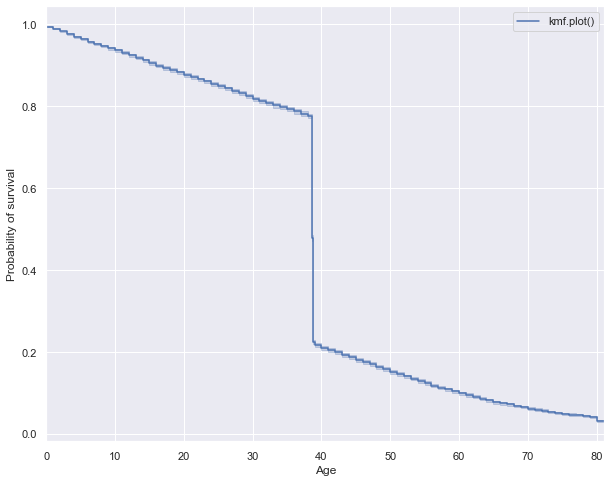

In [103]:
sns.set(rc={'figure.figsize':(10,8)})
kmf = KaplanMeierFitter()
kmf.fit(data['Age'], data['mortstat'], label="kmf.plot()")
ax=kmf.plot()
ax.set(xlabel='Age', ylabel='Probability of survival')

## Create Survival models



In [104]:
# numerical columns
num_cols = ['Age', 'HHIncomeMid', 'Poverty', 'HomeRooms', 'Weight', 'Height', 'BMI', 'Pulse', 'BPSysAve', 'BPDiaAve', 'DirectChol', 'TotChol', 'UrineVol1', 'UrineFlow1', 'DaysPhysHlthBad', 'DaysMentHlthBad', 'SleepHrsNight']

In [105]:
# categorical columns
cate_cols = data.columns.drop('mortstat').drop(num_cols)
# display categorical columns
cate_cols

Index(['Gender', 'Race1', 'Education', 'MaritalStatus', 'HomeOwn', 'Work',
       'Diabetes', 'HealthGen', 'SleepTrouble', 'PhysActive', 'Smoke100'],
      dtype='object')

In [106]:
# convert numerical data 
data[num_cols] = data[num_cols].apply(pd.to_numeric, errors='coerce')

In [107]:
# categorical columns
cate_cols = data.columns.drop('mortstat').drop(num_cols)
# display categorical columns
cate_cols

Index(['Gender', 'Race1', 'Education', 'MaritalStatus', 'HomeOwn', 'Work',
       'Diabetes', 'HealthGen', 'SleepTrouble', 'PhysActive', 'Smoke100'],
      dtype='object')

In [108]:
# X and y
X = data.drop(columns=['mortstat'])
y= data['mortstat']

In [110]:
# Get dummies
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)

[Text(0, 0.5, 'Probability of survival'), Text(0.5, 0, 'Directchol')]

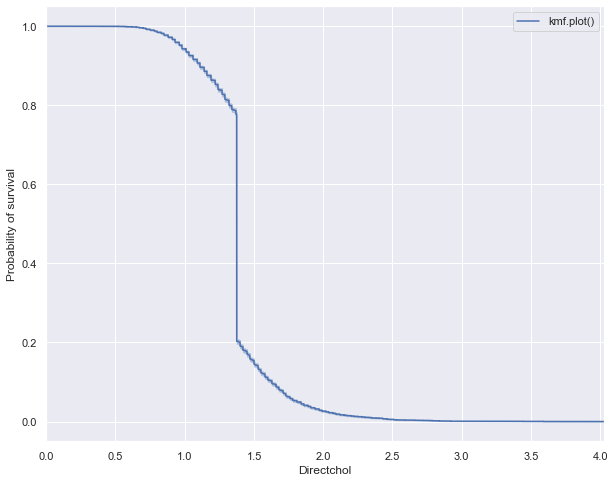

In [111]:
sns.set(rc={'figure.figsize':(10,8)})
kmf = KaplanMeierFitter()
kmf.fit(X['DirectChol'], data['mortstat'], label="kmf.plot()")
ax=kmf.plot()
ax.set(xlabel='Directchol', ylabel='Probability of survival')

## Predict my survivability with some variables

In [142]:
df = data[["Age", "DirectChol","TotChol", "mortstat"]]

In [148]:
##I will try to predict my survivability. i'm a young man with no real health problem. the vector will be this one:
me=np.array([24,1.802,4.589,0])

In [149]:
df.loc[-1] = me
#df["mortstat"] = data["mortstat"]

C:\Users\Ndiaye Dia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [150]:
cph = CoxPHFitter()
cph.fit(df, duration_col='Age',  event_col='mortstat')
censored_subjects = df.loc[df['mortstat'] == 0]

In [151]:
unconditioned_sf = cph.predict_survival_function(censored_subjects)
print(unconditioned_sf.head())

        13        71        97        140       143       167       211    \
0.0  0.996854  0.996854  0.996854  0.996854  0.993034  0.996854  0.994156   
1.0  0.993738  0.993738  0.993738  0.993738  0.986158  0.993738  0.988382   
2.0  0.990304  0.990304  0.990304  0.990304  0.978614  0.990304  0.982039   
3.0  0.987219  0.987219  0.987219  0.987219  0.971862  0.987219  0.976355   
4.0  0.983223  0.983223  0.983223  0.983223  0.963155  0.983223  0.969016   

        227       235       236    ...     23286     23291     23305  \
0.0  0.996854  0.995136  0.995136  ...  0.996854  0.996854  0.996854   
1.0  0.993738  0.990325  0.990325  ...  0.993738  0.993738  0.993738   
2.0  0.990304  0.985034  0.985034  ...  0.990304  0.990304  0.990304   
3.0  0.987219  0.980288  0.980288  ...  0.987219  0.987219  0.987219   
4.0  0.983223  0.974154  0.974154  ...  0.983223  0.983223  0.983223   

        23349     23350     23374     23375     23439     23440    -1      
0.0  0.991737  0.991737  0.9

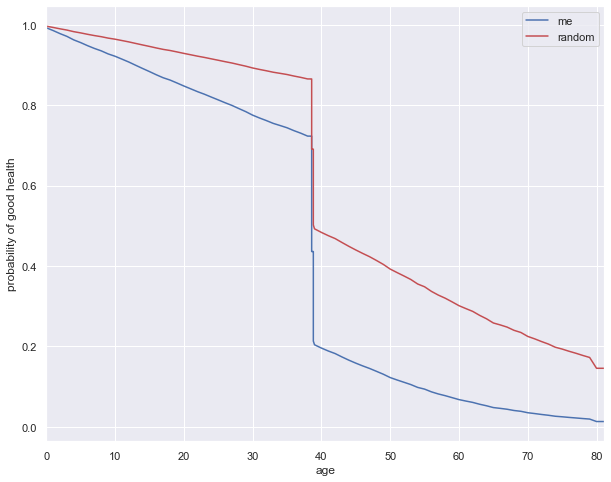

In [147]:
ax=unconditioned_sf[-1].plot(label='me')
unconditioned_sf[167].plot(color='r',ax=ax,label='random')
ax.set(xlabel='age', ylabel='probability of good health')
ax.legend()

The blue curve is my survival curve with some variables. The red one is another random one for exemple. Mine seems not so cool but i have used random value in some variable.  